In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

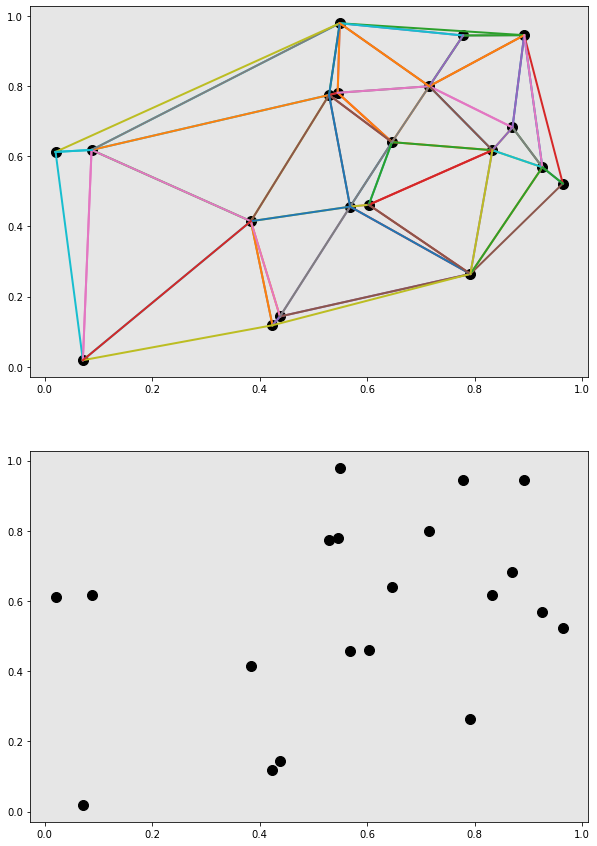

In [2]:
class UnionFind:
    def __init__(self, N):
        self.parent = [i for i in range(N)]
        self.size = [1 for i in range(N)]
        self._operations = 0
        self._calls = 0
    
    def root(self, i):
        p = i
        while self.parent[p] != p:
            p = self.parent[p]
            self._operations += 1
        new_parent = p
        return new_parent
    
    def find(self, i, j):
        self._calls += 1
        return self.root(i) == self.root(j)
    
    def union(self, i, j):
        self._calls += 1
        rooti = self.root(i)
        rootj = self.root(j)
        if rooti != rootj:
            si = self.size[rooti]
            sj = self.size[rootj]
            if si < sj:
                self.parent[rooti] = rootj
            else:
                self.parent[rootj] = rooti
            self._operations += 1

            
class GraphNode:
    def __init__(self):
        self.edges = []
        self.data = {}

def draw_2d_graph(nodes, edges, draw_nodes=True, draw_labels=False, linewidth=2):
    ax = plt.gca()
    ax.set_facecolor((0.9, 0.9, 0.9))
    for (i, j, d) in edges:
        x1, y1 = nodes[i].data['x'], nodes[i].data['y']
        x2, y2 = nodes[j].data['x'], nodes[j].data['y']
        plt.plot([x1, x2], [y1, y2], linewidth=linewidth)
    for i, n in enumerate(nodes):
        if draw_nodes:
            plt.scatter(n.data['x'], n.data['y'], 100, c='k')
            if draw_labels:
                plt.text(n.data['x']+0.002, n.data['y']+0.002, "{}".format(i), zorder=10, c='r', fontsize='xx-large')

def dist_of_edge(e):
    return e[2]

def make_delaunay_graph(N):
    x = np.random.rand(N)
    y = np.random.rand(N)
    nodes = []
    for i in range(N):
        n = GraphNode()
        n.data = {'x':x[i], 'y':y[i]}
        nodes.append(n)
    tri = Delaunay(np.array([x, y]).T).simplices
    edges = set()
    for i in range(tri.shape[0]):
        for k in range(3):
            i1, i2 = tri[i, k], tri[i, (k+1)%3]
            d = np.sqrt(np.sum((x[i1]-x[i2])**2 + (y[i1]-y[i2])**2))
            edges.add((i1, i2, d))
    return nodes, list(edges)

def get_mst_kruskal(nodes, edges):
    edges = sorted(edges, key = dist_of_edge)
    djset = UnionFind(len(nodes))
    new_edges = []
    for e in edges:
        # Edge connecting nodes i and j that are a
        # distance d apart
        (i, j, d) = e 
        ## TODO: Finish this
        
    return new_edges

np.random.seed(0)
nodes, edges = make_delaunay_graph(20)
new_edges = get_mst_kruskal(nodes, edges)

plt.figure(figsize=(10, 15))
plt.subplot(211)
draw_2d_graph(nodes, edges)
plt.subplot(212)
draw_2d_graph(nodes, new_edges)